# Lab 4

In [5]:
## import libs and connect to database

In [6]:
import pandas
import configparser
import psycopg2

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [8]:

conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        dbname = db
                        )

In [10]:
cur=conn.cursor()

# Q1

In [15]:
sql_q1 = 'select * from gp28.student'

In [16]:
df= pandas.read_sql_query(sql_q1,conn)
df[:]

,s_email,s_name,s_major
0,fgracely@gmail.com,Fiona Gracely,Intelligence Analysis
1,mungg4@gmail.com,Evan Mungg,Intelligence Analysis
2,abrush@gmail.com,Alex Brush,Intelligence Analysis
3,DevilDecker@gmail.com,Chloe Decker,Intelligence Analysis
4,shootingMorningstar@gmail.com,Craig Morningstar,Intelligence Analysis


## Q2

In [22]:
sql_q2 = """
        select gp28.professor.p_name,
        gp28.course.c_name
        from gp28.professor
        inner join gp28.course
        on gp28.professor.p_email = gp28.course.p_email
        
        """

In [23]:
df= pandas.read_sql_query(sql_q2,conn)
df[:]

,p_name,c_name
0,Kathleen Moore,Technology Applications in a Networked World
1,Timothy Walton,Hypothesis Testing
2,Ron Raab,AWARENESS AND UNDERSTANDING OF WMD
3,Stephen Marrin,HONOR THESIS IN IA - II
4,new_p,new_c_name
5,new_p,"Data Mining, Modeling and Knowledge Discovery"


## Q3

In [24]:
sql_q3 = """
        select c_number,
        count(c_number) as enrolled
        from gp28.enroll_list
        group by c_number
        order by enrolled desc
        """

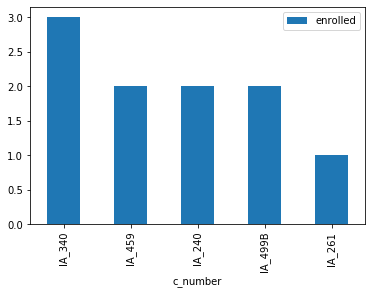

In [26]:
df= pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y='enrolled',x='c_number')

## Q4

In [27]:
sql_q4 = """
        select gp28.professor.p_name,
        count(gp28.course.c_name) as teaching_number
        from gp28.professor
        inner join gp28.course
        on gp28.professor.p_email = gp28.course.p_email
        group by professor.p_name
        order by teaching_number desc
        """

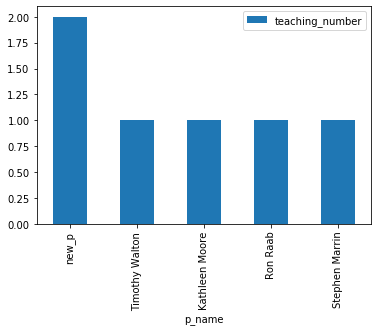

In [30]:
df= pandas.read_sql_query(sql_q4,conn)
df.plot.bar(y='teaching_number',x='p_name')

## Q5

In [99]:
sql_q5_professor = """
                    insert into gp28.professor(p_email,p_name,office)
                    values('{}','{}','{}')
                    """.format('new_pf@jmu.edu','new_p','new_office')

In [100]:
cur.execute(sql_q5_professor)

In [101]:
cur.execute('ROLLBACK')

In [102]:
conn.commit()

In [103]:
df=pandas.read_sql_query('select * from gp28.professor',conn)
df[:]

,p_email,p_name,office
0,moore8ka@jmu.edu,Kathleen Moore,ISAT/CS 116
1,marrinsp@jmu.edu,Stephen Marrin,Eng/Geo2104
2,waltontr@jmu.edu,Timothy Walton,ISAT/CS 326
3,raabrw@jmu.edu,Ron Raab,ISAT/CS 156
4,new_@jmu.edu,new_p,new_office
5,new_p@jmu.edu,new_p,new_office
6,new_pr@jmu.edu,new_p,new_office
7,new_pf@jmu.edu,new_p,new_office


In [104]:
sql_q5_course = """
                    insert into gp28.course(c_number,c_name,room_num,p_email)
                    values('{}','{}','{}')
                    """.format('ia_new','new_c_name','online','new_p@jmu.edu')

In [105]:
cur.execute('ROLLBACK')

In [106]:
conn.commit()

In [107]:
df=pandas.read_sql_query('select * from gp28.course',conn)
df[:]

,c_number,c_name,room_num,p_email
0,IA_240,Technology Applications in a Networked World,Online,moore8ka@jmu.edu
1,IA_459,AWARENESS AND UNDERSTANDING OF WMD,Eng/Geo 1301,raabrw@jmu.edu
2,IA_499B,HONOR THESIS IN IA - II,Online,marrinsp@jmu.edu
3,ia_new,new_c_name,online,new_p@jmu.edu
4,IA_340,"Data Mining, Modeling and Knowledge Discovery",Online,new_p@jmu.edu
5,IA_261,Hypothesis Testing,ISAT/CS 0148,new_pr@jmu.edu


## Q6

In [108]:
sql_q6_course = """
                update gp28.course
                set p_email = '{}'
                where p_email = '{}'
                """.format('new_pr@jmu.edu','waltontr@jmu.edu')

In [109]:
cur.execute(sql_q6_course)

In [110]:
cur.execute('ROLLBACK')

In [111]:
#cur.execute('ROLLBACK')

In [112]:
conn.commit()

In [113]:
df=pandas.read_sql_query('select * from gp28.course',conn)
df[:]

,c_number,c_name,room_num,p_email
0,IA_240,Technology Applications in a Networked World,Online,moore8ka@jmu.edu
1,IA_459,AWARENESS AND UNDERSTANDING OF WMD,Eng/Geo 1301,raabrw@jmu.edu
2,IA_499B,HONOR THESIS IN IA - II,Online,marrinsp@jmu.edu
3,ia_new,new_c_name,online,new_p@jmu.edu
4,IA_340,"Data Mining, Modeling and Knowledge Discovery",Online,new_p@jmu.edu
5,IA_261,Hypothesis Testing,ISAT/CS 0148,new_pr@jmu.edu


In [114]:
sql_q6_professor = """
                delete from gp28.professor
                where p_email = '{}'
                """.format('waltontr@jmu.edu')

In [115]:
cur.execute(sql_q6_professor)

In [116]:
conn.commit()

In [117]:
df=pandas.read_sql_query('select * from gp28.professor',conn)
df[:]

,p_email,p_name,office
0,moore8ka@jmu.edu,Kathleen Moore,ISAT/CS 116
1,marrinsp@jmu.edu,Stephen Marrin,Eng/Geo2104
2,raabrw@jmu.edu,Ron Raab,ISAT/CS 156
3,new_@jmu.edu,new_p,new_office
4,new_p@jmu.edu,new_p,new_office
5,new_pr@jmu.edu,new_p,new_office
6,new_pf@jmu.edu,new_p,new_office


## close connection

In [118]:
cur.close()
conn.close()